#  Cellular Network Performance Modeling Project

##  Overview

In the telecommunications industry, maintaining high-quality cellular network performance is critical for customer satisfaction, retention, and operational efficiency. This project uses a real-world dataset containing geolocated signal measurements and network performance metrics to analyze and model key indicators of network health. By combining regression and classification approaches, the aim is to evaluate and predict network performance and classify zones based on service quality.

---

## Problem Statement

Mobile network operators face challenges in ensuring consistent service quality across regions. Variability in signal strength, data throughput, and latency can result in user dissatisfaction, especially in high-traffic or underserved areas. There is a need to:

- Accurately predict network performance metrics at any given location and time.
- Identify and classify zones by quality of service.
- Predict the network type (3G, 4G, 5G, etc.) based on environmental and signal parameters.

---

##  Project Objectives

### Primary Objectives

1. **Regression**:
   - Predict continuous performance metrics:
     - Signal Strength (dBm)
     - Signal Quality (%)
     - Data Throughput (Mbps)
     - Latency (ms)

2. **Classification**:
   - Classify zones into service quality levels: **Good**, **Moderate**, or **Poor**.
   - Predict the **network type** (e.g., 3G, 4G, 5G) based on observed signal and performance data.

3. **Geospatial Analysis**:
   - Map regions with poor or inconsistent network coverage.
   - Provide data-driven recommendations for infrastructure improvements.

###  Secondary Objectives

- Compare the reliability of different signal measurement tools (BB60C, srsRAN, BladeRFxA9).
- Understand correlation between geographic, temporal, and signal-related factors.

---

##  Metrics of Success

###  Technical Success Metrics

| Task | Metrics |
|------|---------|
| Regression (Signal/Throughput/Latency) | RMSE, MAE, R² |
| Zone Classification | Accuracy, Precision, Recall, F1-Score |
| Network Type Classification | Accuracy, Confusion Matrix, ROC-AUC |
| Feature Importance | Gain-based or SHAP value insights |

###  Business Success Metrics

| Goal | Indicator |
|------|-----------|
| Improved coverage planning | Identifying underserved zones with >90% accuracy |
| Network type predictability | >80% accuracy in predicting network types |
| Targeted optimization | Actionable insights for at least 3 key zones |
| Scalability | Model generalizes well to new geolocations |


#  Data Understanding – Cellular Network Performance Project

##  Dataset Overview

This dataset contains signal quality measurements from various geographic locations and cellular network types. The goal is to assess and model the quality of service across different network types and environments.

---

##  Key Features

| Column Name        | Description |
|--------------------|-------------|
| `latitude`         | Latitude coordinate where signal was measured |
| `longitude`        | Longitude coordinate where signal was measured |
| `timestamp`        | Time of measurement |
| `tool`             | Measurement tool used (e.g., BB60C, srsRAN, BladeRFxA9) |
| `network_type`     | Type of mobile network (3G, 4G, LTE, 5G) |
| `locality`         | Area classification (Urban, Suburban, Rural) |
| `signal_strength`  | Signal power in dBm |
| `signal_quality`   | Quality of the signal (percentage) |
| `data_throughput`  | Data transmission speed (Mbps) |
| `latency`          | Network delay in milliseconds (ms) |

---





# Exploring the dataset


In [134]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [95]:
# Loading the dataset
df = pd.read_csv('signal_metrics.csv')
df

Timestamp           Locality   Latitude  Longitude  \
0      2023-05-05 12:50:40.000000           Anisabad  25.599109  85.137355   
1      2023-05-05 12:53:47.210173        Fraser Road  25.433286  85.070053   
2      2023-05-05 12:56:54.420346  Boring Canal Road  25.498809  85.211371   
3      2023-05-05 13:00:01.630519            Danapur  25.735138  85.208400   
4      2023-05-05 13:03:08.840692    Phulwari Sharif  25.538556  85.159860   
...                           ...                ...        ...        ...   
16824  2023-06-10 23:44:23.950552        Pataliputra  25.542846  85.129611   
16825  2023-06-10 23:47:31.160725  Boring Canal Road  25.724624  85.233365   
16826  2023-06-10 23:50:38.370898        Boring Road  25.574020  85.030036   
16827  2023-06-10 23:53:45.581071        Boring Road  25.619325  85.183155   
16828  2023-06-10 23:56:52.791244     Rajendra Nagar  25.682516  85.264655   

       Signal Strength (dBm)  Signal Quality (%)  Data Throughput (Mbps)  \
0                 -84.274113                 0.0                1.863890   
1                 -97.653121                 0.0                5.132296   
2                 -87.046134                 0.0                1.176985   
3                 -94.143159                 0.0               68.596932   
4                 -94.564765                 0.0               38.292038   
...                      ...                 ...                     ...   
16824             -92.024221                 0.0                3.720856   
16825             -87.579509                 0.0                2.117080   
16826             -90.451396                 0.0               72.870842   
16827             -85.661814                 0.0                2.482843   
16828             -93.228967                 0.0                1.638291   

       Latency (ms) Network Type  BB60C Measurement (dBm)  \
0        129.122914           3G                 0.000000   
1         54.883606           4G               -95.810791   
2        119.598286          LTE               -91.593861   
3         46.598387           5G               -90.642773   
4         30.342828           5G               -90.489100   
...             ...          ...                      ...   
16824     53.376474           4G               -90.177947   
16825    134.458401          LTE               -87.694985   
16826     32.556578           5G               -91.098875   
16827    144.007572           3G                 0.000000   
16828    123.234570          LTE               -95.598301   

       srsRAN Measurement (dBm)  BladeRFxA9 Measurement (dBm)  
0                      0.000000                      0.000000  
1                   -105.452359                    -99.920892  
2                    -95.419482                    -87.714070  
3                   -101.895905                    -96.570698  
4                   -103.318304                    -95.102467  
...                         ...                           ...  
16824                -97.971619                    -93.362041  
16825                -92.616868                    -84.749607  
16826                -97.447725                    -87.752628  
16827                  0.000000                      0.000000  
16828                -99.438645                    -94.268015  

[16829 rows x 12 columns]

In [96]:
#Asserting the shape
df.shape

(16829, 12)

In [97]:
# Checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16829 entries, 0 to 16828
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     16829 non-null  object 
 1   Locality                      16829 non-null  object 
 2   Latitude                      16829 non-null  float64
 3   Longitude                     16829 non-null  float64
 4   Signal Strength (dBm)         16829 non-null  float64
 5   Signal Quality (%)            16829 non-null  float64
 6   Data Throughput (Mbps)        16829 non-null  float64
 7   Latency (ms)                  16829 non-null  float64
 8   Network Type                  16829 non-null  object 
 9   BB60C Measurement (dBm)       16829 non-null  float64
 10  srsRAN Measurement (dBm)      16829 non-null  float64
 11  BladeRFxA9 Measurement (dBm)  16829 non-null  float64
dtypes: float64(9), object(3)
memory usage: 1.5+ MB


In [98]:
# Checking for statistical info for numerical values
df.describe().T

count        mean        std         min  \
Latitude                      16829.0   25.594796   0.089881   25.414575   
Longitude                     16829.0   85.137314   0.090095   84.957936   
Signal Strength (dBm)         16829.0  -90.072484   5.399368 -116.942267   
Signal Quality (%)            16829.0    0.000000   0.000000    0.000000   
Data Throughput (Mbps)        16829.0   16.182856  25.702734    1.000423   
Latency (ms)                  16829.0  101.313624  56.010418   10.019527   
BB60C Measurement (dBm)       16829.0  -68.820150  40.046739 -115.667514   
srsRAN Measurement (dBm)      16829.0  -74.439562  43.215204 -124.652054   
BladeRFxA9 Measurement (dBm)  16829.0  -68.819930  39.996934 -119.207545   

                                     25%         50%         75%         max  
Latitude                       25.522858   25.595383   25.667620   25.773648  
Longitude                      85.064124   85.138149   85.209504   85.316994  
Signal Strength (dBm)         -93.615962  -89.665566  -86.145491  -74.644848  
Signal Quality (%)              0.000000    0.000000    0.000000    0.000000  
Data Throughput (Mbps)          2.001749    2.997175    9.956314   99.985831  
Latency (ms)                   50.320775  100.264318  149.951112  199.991081  
BB60C Measurement (dBm)       -94.021959  -89.126942    0.000000    0.000000  
srsRAN Measurement (dBm)     -101.249987  -96.838442    0.000000    0.000000  
BladeRFxA9 Measurement (dBm)  -93.749032  -89.282746    0.000000    0.000000

In [99]:
#Checking statistical information for objects
df.describe(include=object).T

count unique                         top  freq
Timestamp     16829  16829  2023-05-05 12:50:40.000000     1
Locality      16829     20                 Fraser Road   897
Network Type  16829      4                         LTE  4224

In [100]:
#Checking for missing values
df.isnull().sum()

Timestamp                       0
Locality                        0
Latitude                        0
Longitude                       0
Signal Strength (dBm)           0
Signal Quality (%)              0
Data Throughput (Mbps)          0
Latency (ms)                    0
Network Type                    0
BB60C Measurement (dBm)         0
srsRAN Measurement (dBm)        0
BladeRFxA9 Measurement (dBm)    0
dtype: int64

In [101]:
#Checking for duplicates
df.duplicated().sum()

0

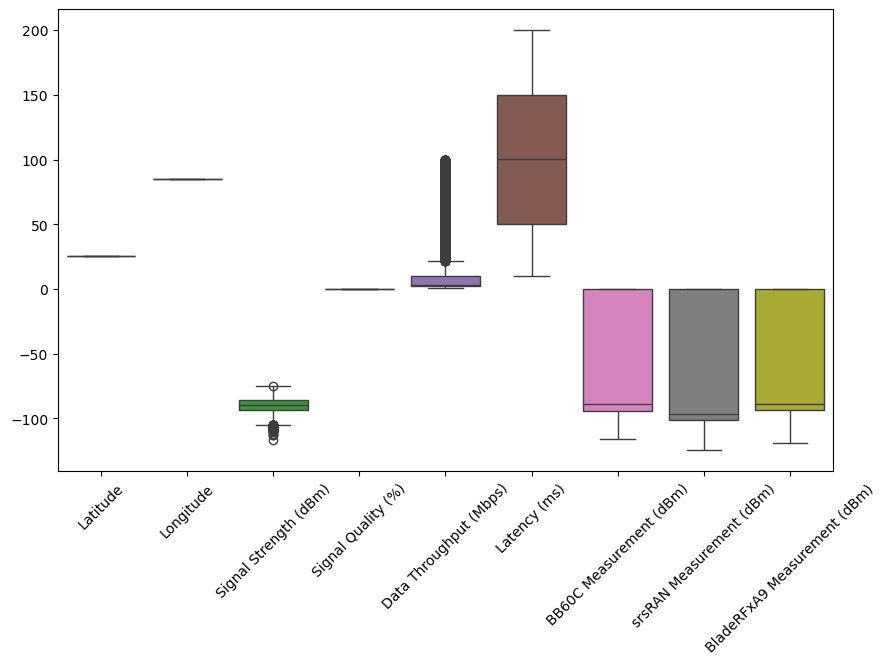

In [102]:
#Checking for outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

# Data Preparation

In [103]:
# Dropping unnecessary columns
df.drop(columns=['Locality'],axis=1,inplace=True)

In [104]:
#changing column format to lower case and handling white spaces
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ","_")

In [105]:
#Confirming th changes
df.head()

timestamp   latitude  longitude  signal_strength_(dbm)  \
0  2023-05-05 12:50:40.000000  25.599109  85.137355             -84.274113   
1  2023-05-05 12:53:47.210173  25.433286  85.070053             -97.653121   
2  2023-05-05 12:56:54.420346  25.498809  85.211371             -87.046134   
3  2023-05-05 13:00:01.630519  25.735138  85.208400             -94.143159   
4  2023-05-05 13:03:08.840692  25.538556  85.159860             -94.564765   

   signal_quality_(%)  data_throughput_(mbps)  latency_(ms) network_type  \
0                 0.0                1.863890    129.122914           3G   
1                 0.0                5.132296     54.883606           4G   
2                 0.0                1.176985    119.598286          LTE   
3                 0.0               68.596932     46.598387           5G   
4                 0.0               38.292038     30.342828           5G   

   bb60c_measurement_(dbm)  srsran_measurement_(dbm)  \
0                 0.000000                  0.000000   
1               -95.810791               -105.452359   
2               -91.593861                -95.419482   
3               -90.642773               -101.895905   
4               -90.489100               -103.318304   

   bladerfxa9_measurement_(dbm)  
0                      0.000000  
1                    -99.920892  
2                    -87.714070  
3                    -96.570698  
4                    -95.102467

In [106]:
#Checking for unique values and value counts
df['network_type'].value_counts()

network_type
LTE    4224
4G     4219
3G     4208
5G     4178
Name: count, dtype: int64

In [107]:
df['signal_quality_(%)'].value_counts()

signal_quality_(%)
0.0    16829
Name: count, dtype: int64

In [108]:
df.drop(columns=['signal_quality_(%)'],axis=1,inplace=True)

## Feature Engineering

In [109]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month



In [150]:
def map_time_of_day(hour):
    if 0 <= hour <= 1:
        return "Midnight"
    elif 2 <= hour <= 3:
        return "Very Late Night"
    elif 4 <= hour <= 5:
        return "Pre-dawn"
    elif 6 <= hour <= 8:
        return "Early Morning"
    elif 9 <= hour <= 11:
        return "Mid-Morning"
    elif hour == 12:
        return "Midday"
    elif 13 <= hour <= 15:
        return "Early Afternoon"
    elif 16 <= hour <= 17:
        return "Late Afternoon"
    elif 18 <= hour <= 19:
        return "Early Evening"
    elif hour == 20:
        return "Late Evening"
    elif 21 <= hour <= 22:
        return "Night"
    elif hour == 23:
        return "Late Night"
    
    # Create new time-of-day feature
df['time_of_day'] = df['hour'].apply(map_time_of_day)

In [151]:
df.head()

timestamp   latitude  longitude  signal_strength_(dbm)  \
0 2023-05-05 12:50:40.000000  25.599109  85.137355             -84.274113   
1 2023-05-05 12:53:47.210173  25.433286  85.070053             -97.653121   
2 2023-05-05 12:56:54.420346  25.498809  85.211371             -87.046134   
3 2023-05-05 13:00:01.630519  25.735138  85.208400             -94.143159   
4 2023-05-05 13:03:08.840692  25.538556  85.159860             -94.564765   

   data_throughput_(mbps)  latency_(ms) network_type  bb60c_measurement_(dbm)  \
0                1.863890    129.122914           3G                 0.000000   
1                5.132296     54.883606           4G               -95.810791   
2                1.176985    119.598286          LTE               -91.593861   
3               68.596932     46.598387           5G               -90.642773   
4               38.292038     30.342828           5G               -90.489100   

   srsran_measurement_(dbm)  bladerfxa9_measurement_(dbm)  hour  day_of_week  \
0                  0.000000                      0.000000    12            4   
1               -105.452359                    -99.920892    12            4   
2                -95.419482                    -87.714070    12            4   
3               -101.895905                    -96.570698    13            4   
4               -103.318304                    -95.102467    13            4   

   month      time_of_day  
0      5           Midday  
1      5           Midday  
2      5           Midday  
3      5  Early Afternoon  
4      5  Early Afternoon

# Exploratory Data Analysis (EDA)

## Uni-variate Analysis

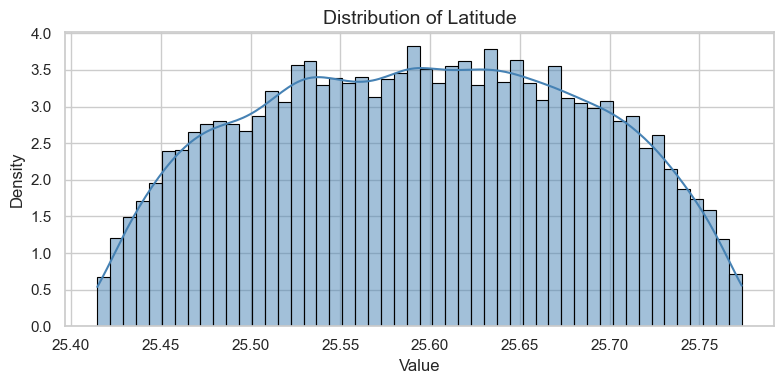

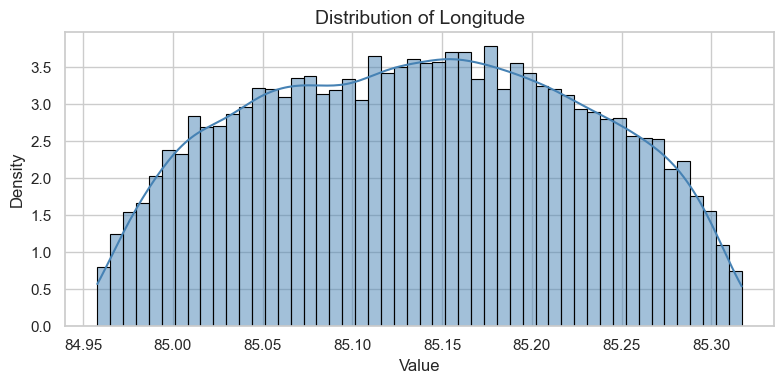

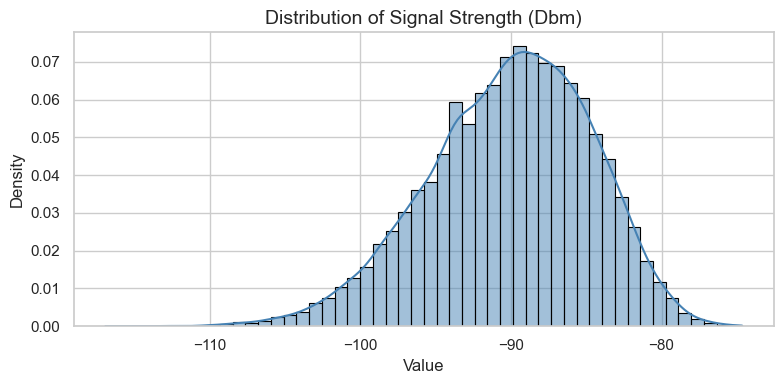

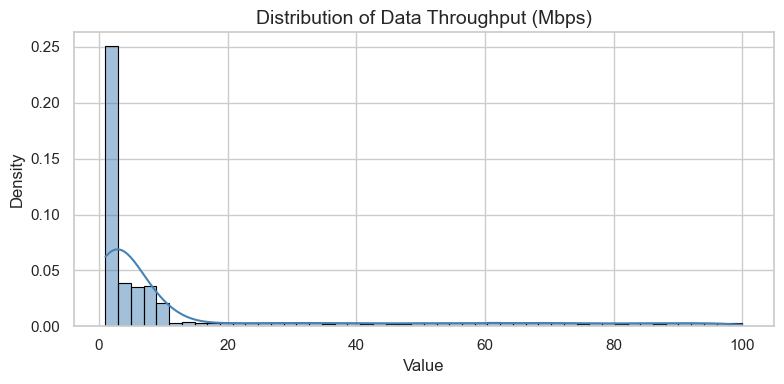

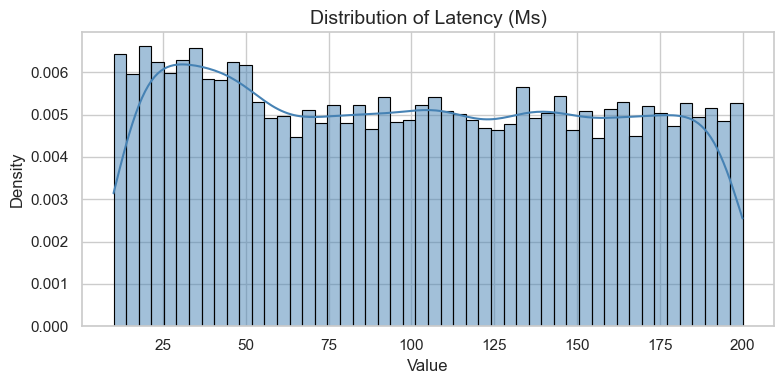

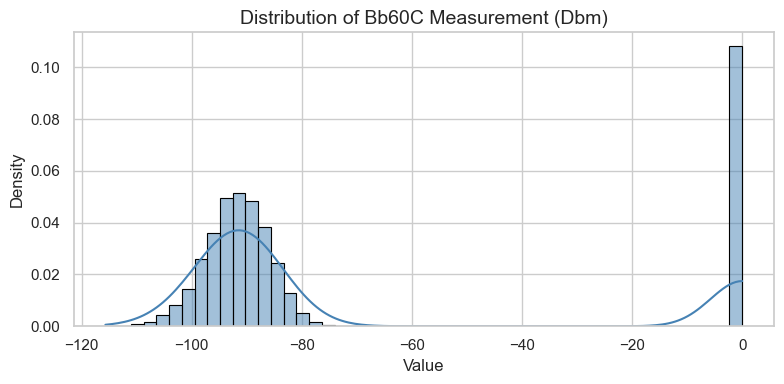

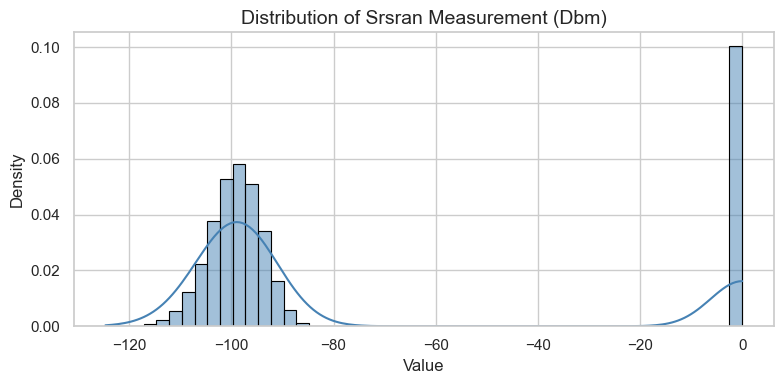

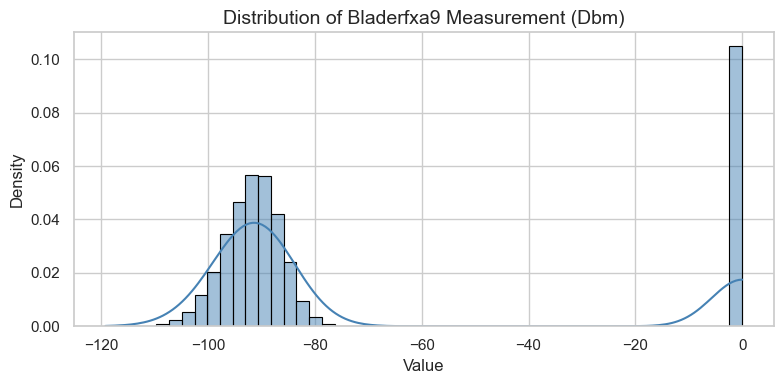

In [116]:
# Select all numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Set style
sns.set(style="whitegrid")

# Plot distributions
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].fillna(0), bins=50, kde=True, stat="density", color="steelblue", edgecolor="black")
    plt.title(f"Distribution of {col.replace('_', ' ').title()}", fontsize=14)
    plt.xlabel("Value", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.tight_layout()
    plt.show()


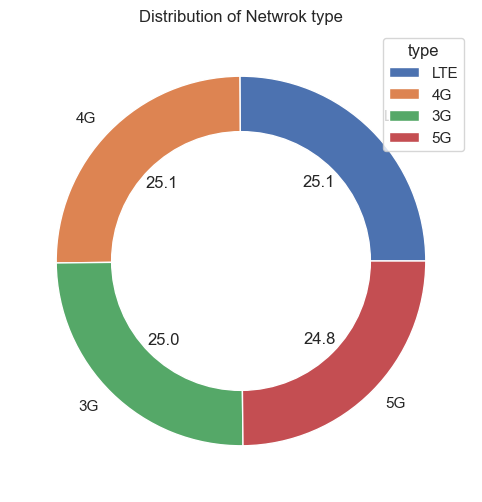

In [164]:
# Distribution of accidents per country
network_count = df['network_type'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(network_count,labels=network_count.index,autopct='%1.1f')

#Create blank circle
centre_circle =plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

#Customize the plot
plt.title('Distribution of Netwrok type')
plt.legend(title='type',loc ='upper right')
plt.show()

## Bi-Variate Analysis

### Numeric Vs Numeric

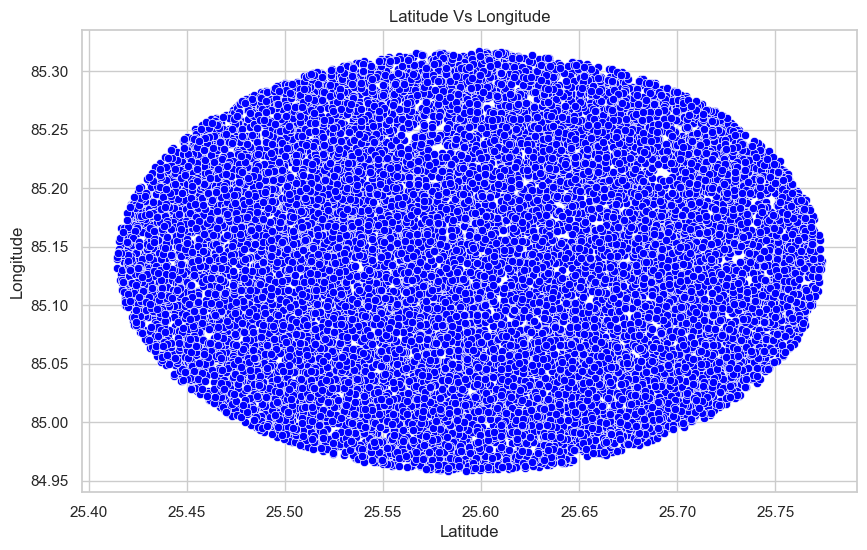

In [125]:
#Latitude vs Longitude
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['latitude'],y=df['longitude'],color=('blue'),data=df)
plt.title('Latitude Vs Longitude')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

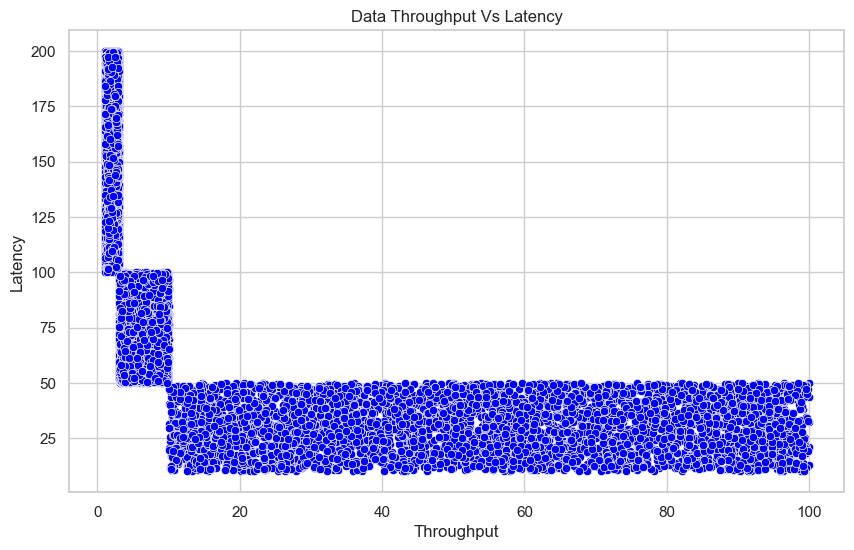

In [127]:
#Throughput vs Latency
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['data_throughput_(mbps)'],y=df['latency_(ms)'],color=('blue'),data=df)
plt.title('Data Throughput Vs Latency')
plt.xlabel("Throughput")
plt.ylabel("Latency")
plt.show()

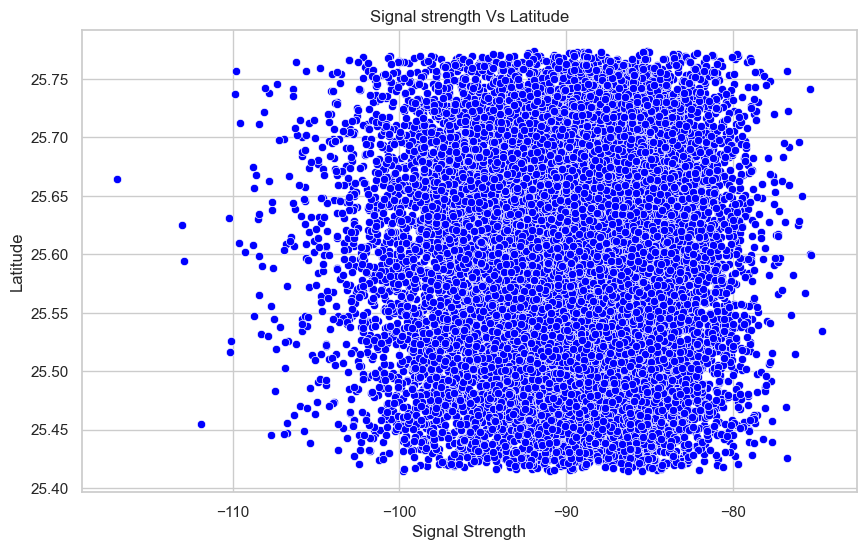

In [128]:
#Signal strength vs Latitude
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['signal_strength_(dbm)'],y=df['latitude'],color=('blue'),data=df)
plt.title('Signal strength Vs Latitude')
plt.xlabel("Signal Strength")
plt.ylabel("Latitude")
plt.show()

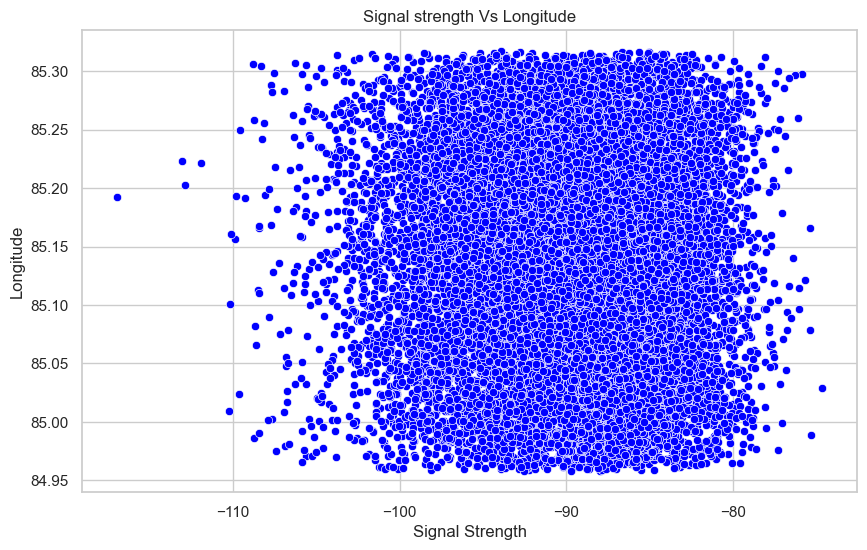

In [129]:
#Signal strength vs Longitude
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['signal_strength_(dbm)'],y=df['longitude'],color=('blue'),data=df)
plt.title('Signal strength Vs Longitude')
plt.xlabel("Signal Strength")
plt.ylabel("Longitude")
plt.show()

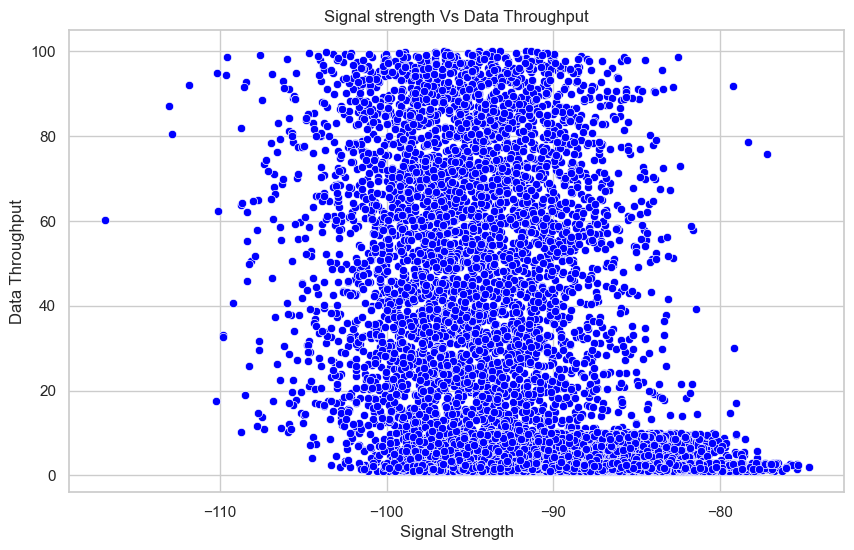

In [130]:
#Signal strength vs Throughput
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['signal_strength_(dbm)'],y=df['data_throughput_(mbps)'],color=('blue'),data=df)
plt.title('Signal strength Vs Data Throughput')
plt.xlabel("Signal Strength")
plt.ylabel("Data Throughput")
plt.show()

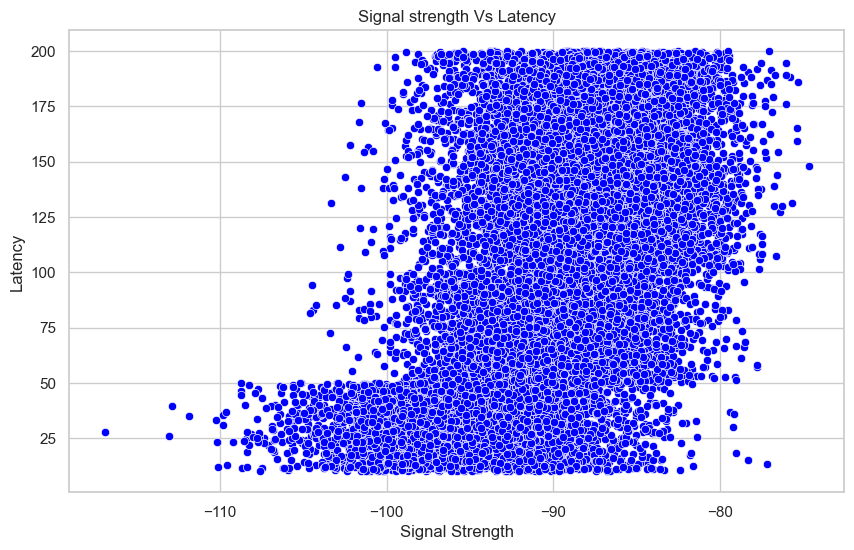

In [131]:
#Signal strength vs Latency
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['signal_strength_(dbm)'],y=df['latency_(ms)'],color=('blue'),data=df)
plt.title('Signal strength Vs Latency')
plt.xlabel("Signal Strength")
plt.ylabel("Latency")
plt.show()

### Categorical Vs Numeric

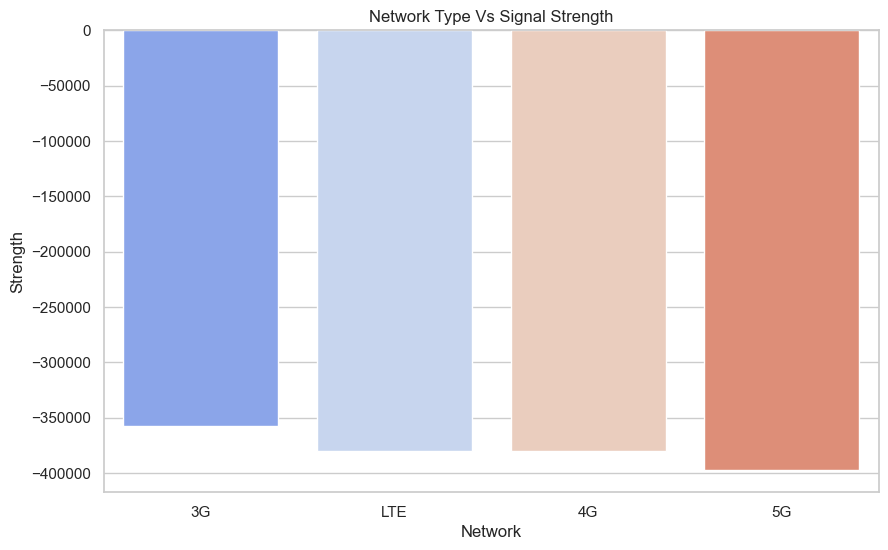

In [ ]:
#Network Type vs Signal Strength
net_signals = df.groupby('network_type')['signal_strength_(dbm)'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=net_signals.index,y=net_signals.values,palette="coolwarm")
plt.title('Network Type Vs Signal Strength')
plt.xlabel('Network')
plt.ylabel('Strength')
plt.show()

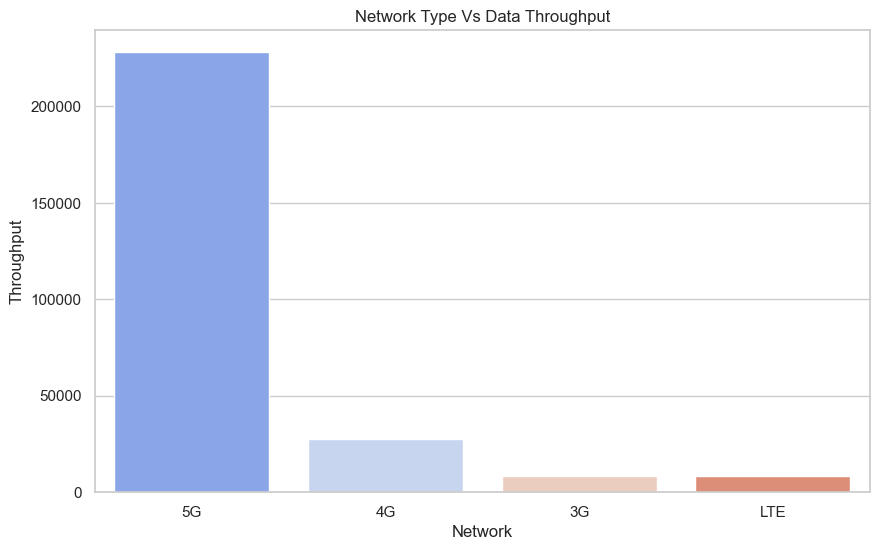

In [136]:
#Network Type vs Throughput
net_throughput = df.groupby('network_type')['data_throughput_(mbps)'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=net_throughput.index,y=net_throughput.values,palette="coolwarm")
plt.title('Network Type Vs Data Throughput')
plt.xlabel('Network')
plt.ylabel('Throughput')
plt.show()

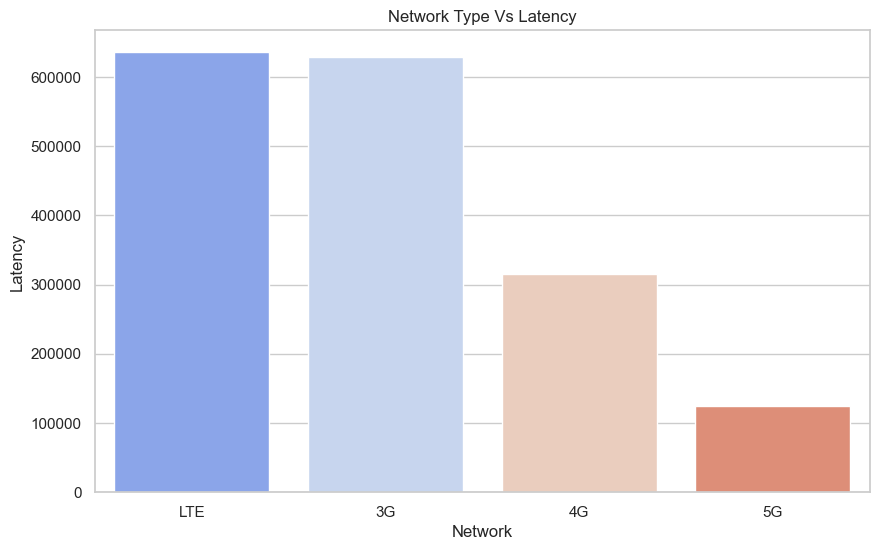

In [137]:
#Network Type vs latency
net_latency = df.groupby('network_type')['latency_(ms)'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=net_latency.index,y=net_latency.values,palette="coolwarm")
plt.title('Network Type Vs Latency')
plt.xlabel('Network')
plt.ylabel('Latency')
plt.show()

### Time Trends

In [145]:
df['hour'].value_counts()

hour
15    712
17    712
19    712
21    712
13    712
14    711
16    711
18    711
20    711
22    711
23    711
12    695
5     693
9     693
7     693
11    693
3     693
1     693
6     692
2     692
10    692
0     692
4     691
8     691
Name: count, dtype: int64

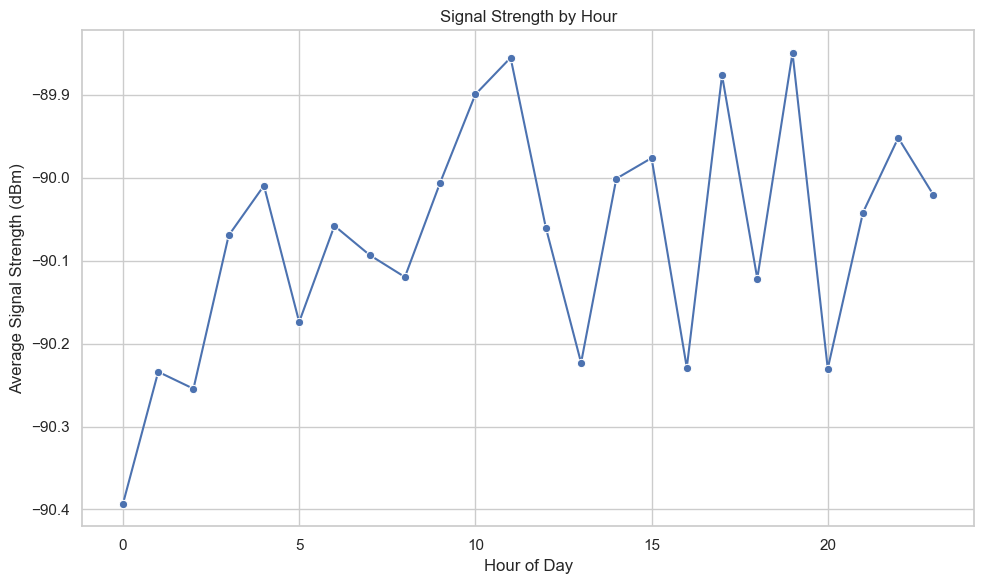

In [ ]:
# Signal strength by hour
hourly_signals = df.groupby('hour')['signal_strength_(dbm)'].mean()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_signals.index, y=hourly_signals.values,marker='o')
plt.title('Signal Strength by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Signal Strength (dBm)')
plt.grid(True)
plt.tight_layout()
plt.show()

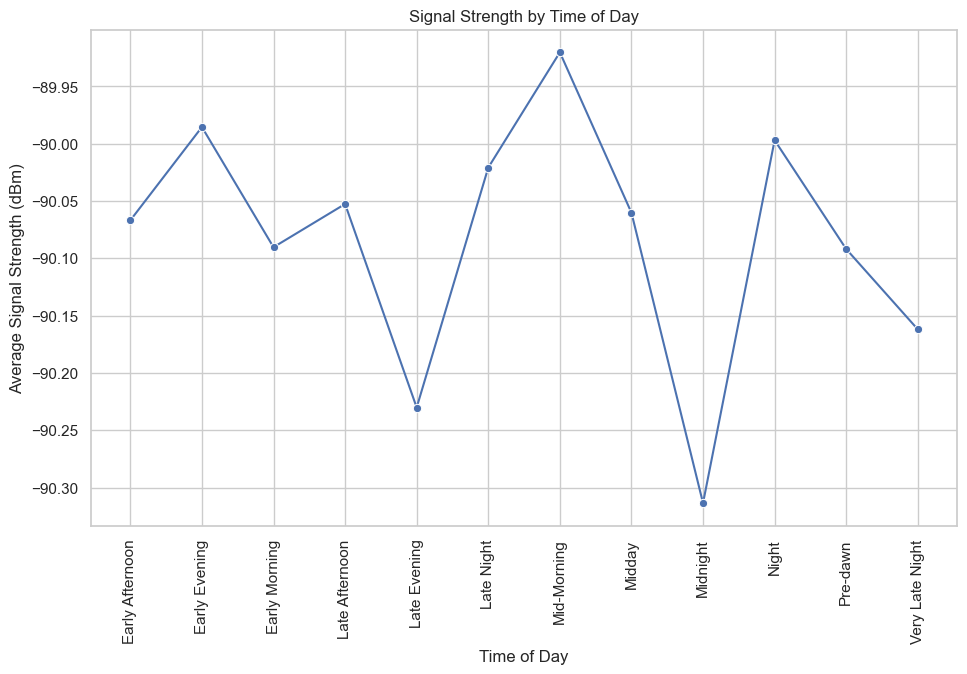

In [ ]:
# signal strength by time of day
day_signals = df.groupby('time_of_day')['signal_strength_(dbm)'].mean()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=day_signals.index, y=day_signals.values,marker='o')
plt.title('Signal Strength by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Signal Strength (dBm)')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

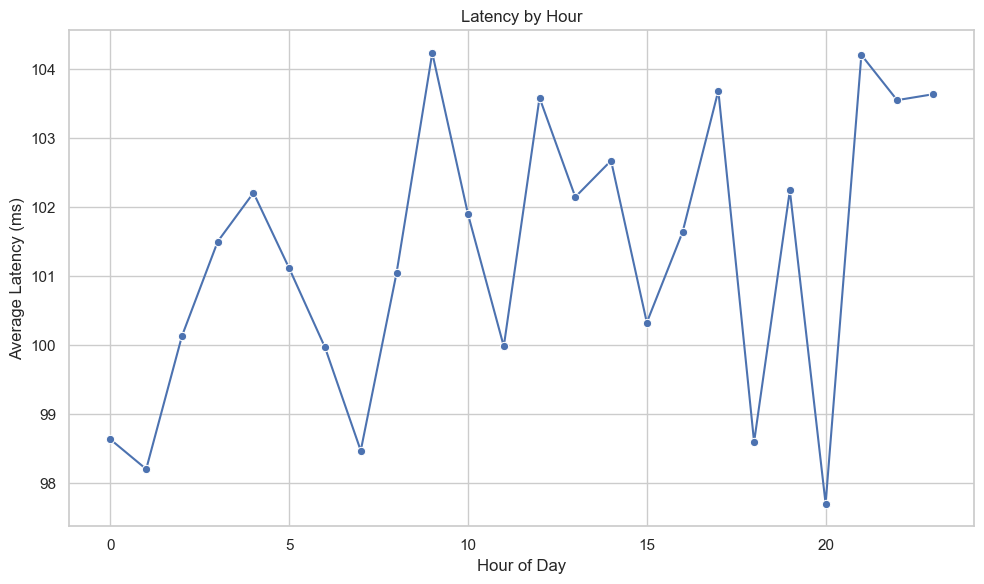

In [160]:
# Latency by hour
lat_signals = df.groupby('hour')['latency_(ms)'].mean()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=lat_signals.index, y=lat_signals.values,marker='o')
plt.title('Latency by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Latency (ms)')
plt.grid(True)
plt.tight_layout()
plt.show()

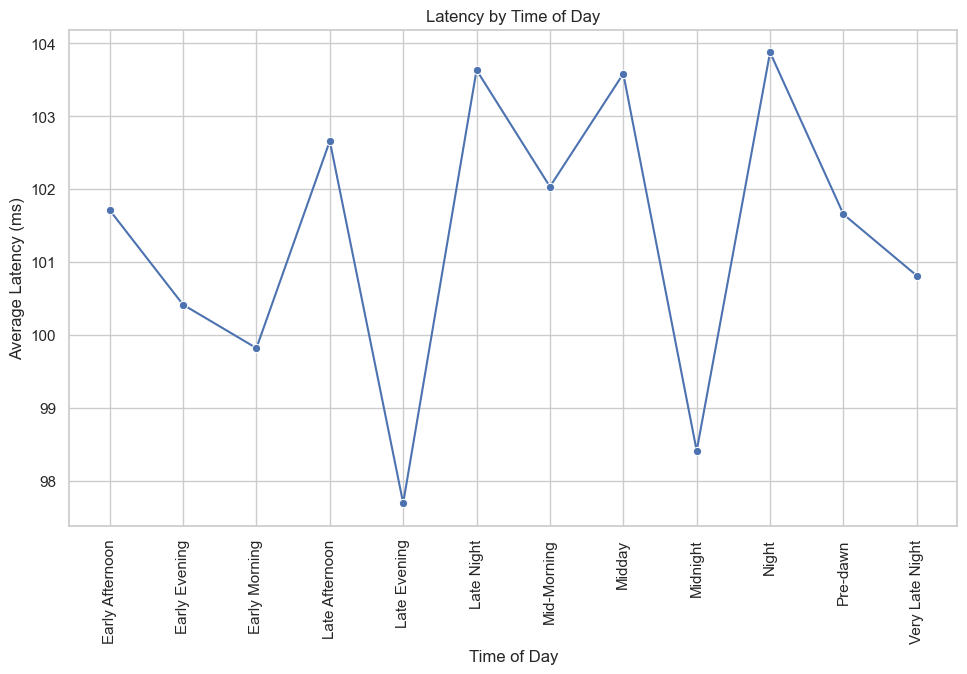

In [161]:
# Latency by time of day
day_lat = df.groupby('time_of_day')['latency_(ms)'].mean()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=day_lat.index, y=day_lat.values,marker='o')
plt.title('Latency by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Latency (ms)')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

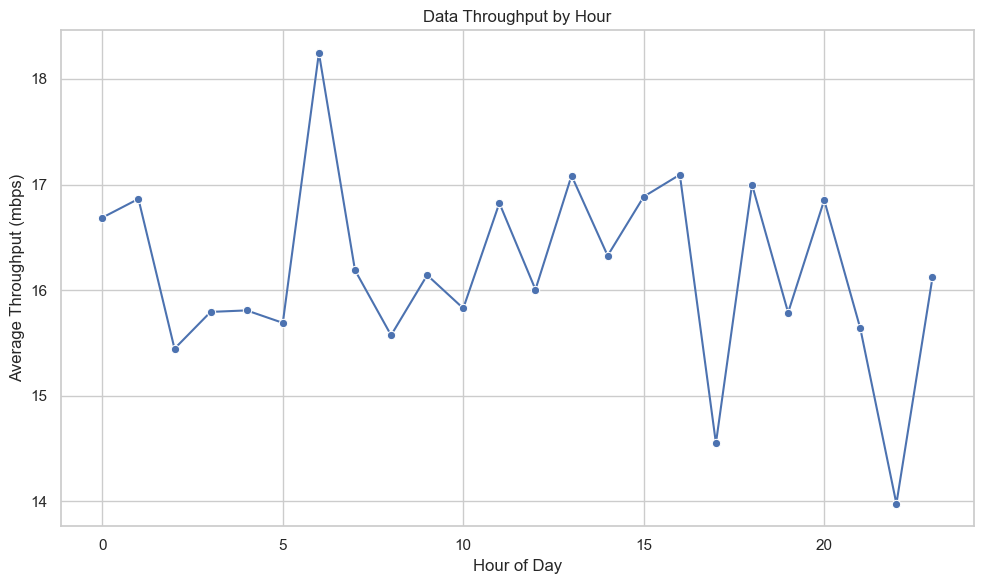

In [162]:
# Throughput by hour
data_hour = df.groupby('hour')['data_throughput_(mbps)'].mean()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=data_hour.index, y=data_hour.values,marker='o')
plt.title('Data Throughput by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Throughput (mbps)')
plt.grid(True)
plt.tight_layout()
plt.show()

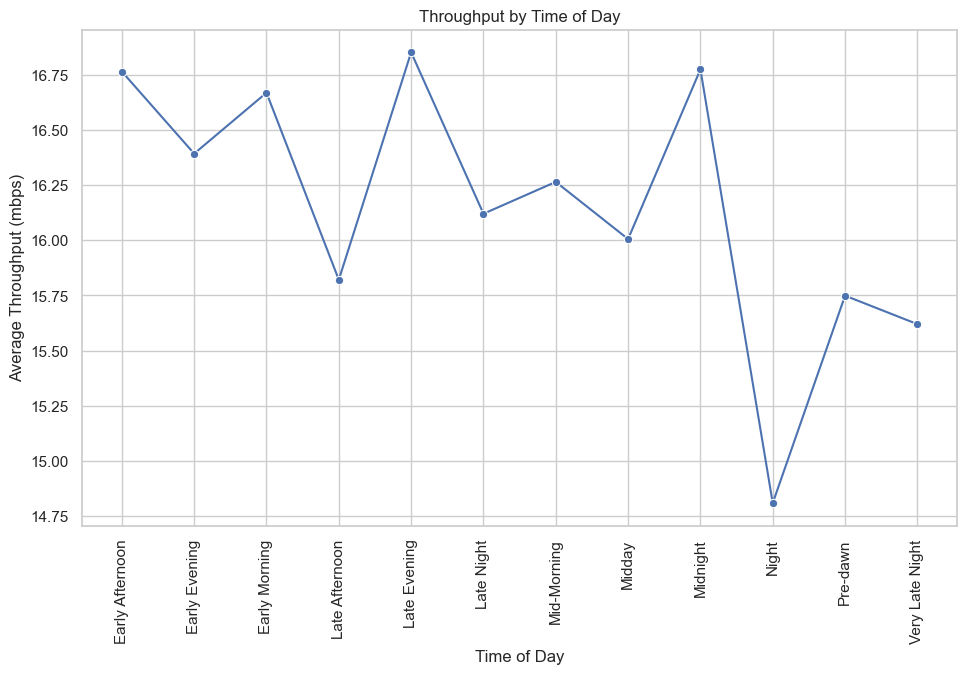

In [163]:
# Throughput by time of day
day_throughput = df.groupby('time_of_day')['data_throughput_(mbps)'].mean()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=day_throughput.index, y=day_throughput.values,marker='o')
plt.title('Throughput by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Throughput (mbps)')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

## Multi-variate Analysis

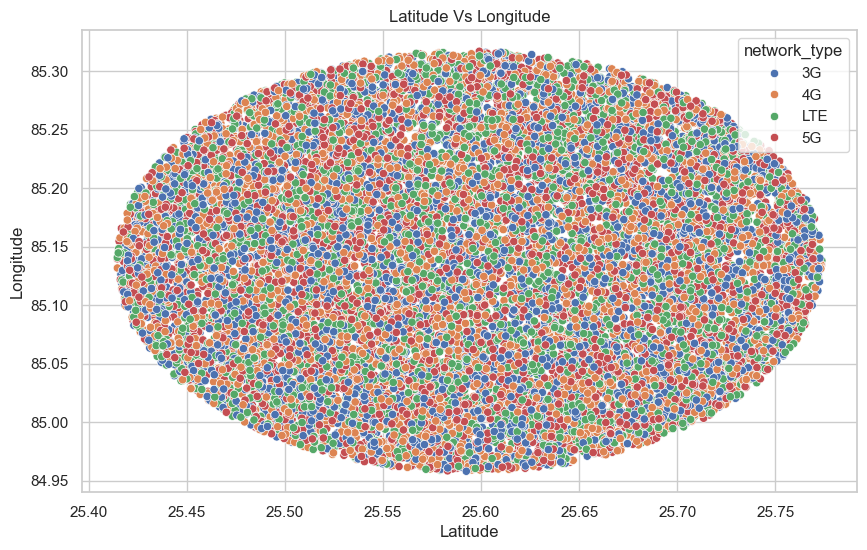

In [138]:
#Latitude vs Longitude in relation to Network Type
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['latitude'],y=df['longitude'],hue=df['network_type'],data=df)
plt.title('Latitude Vs Longitude')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

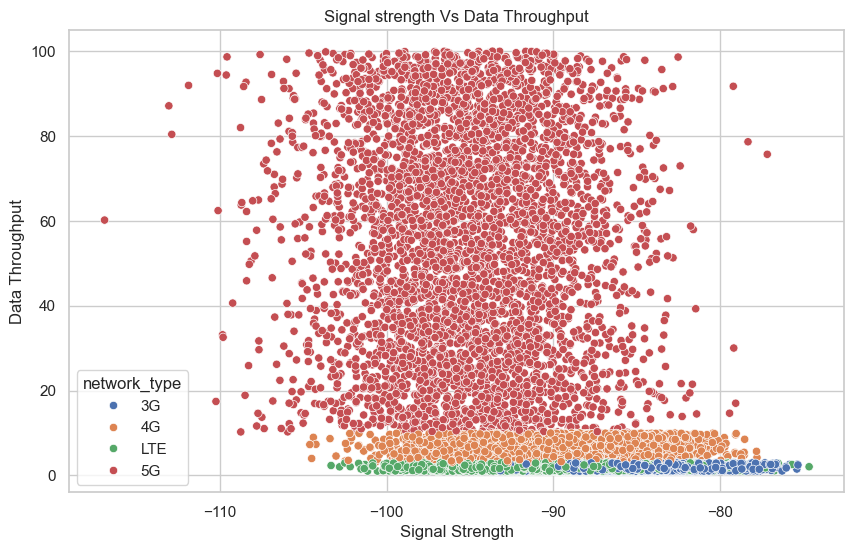

In [139]:
#Signal strength vs Throughput in relation to network type
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['signal_strength_(dbm)'],y=df['data_throughput_(mbps)'],hue=df['network_type'],data=df)
plt.title('Signal strength Vs Data Throughput')
plt.xlabel("Signal Strength")
plt.ylabel("Data Throughput")
plt.show()

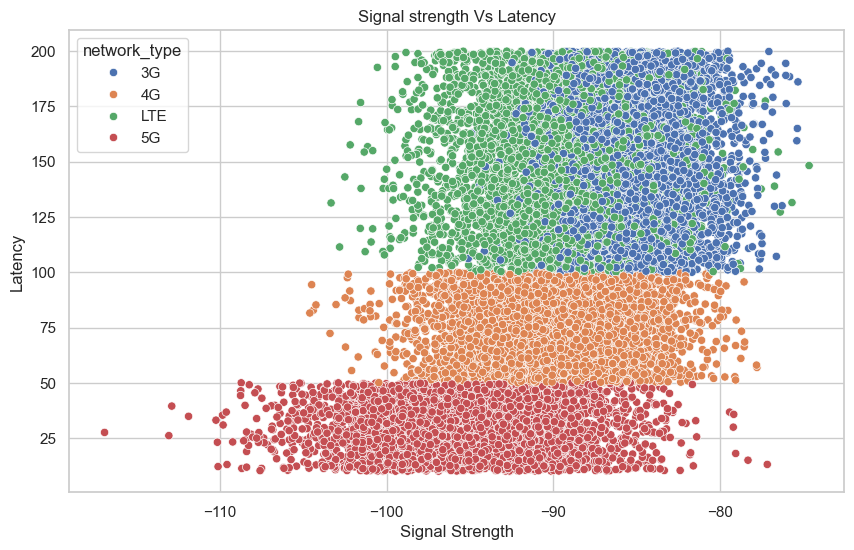

In [140]:
#Signal strength vs Latency in relation to Network Type
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['signal_strength_(dbm)'],y=df['latency_(ms)'],hue=df['network_type'],data=df)
plt.title('Signal strength Vs Latency')
plt.xlabel("Signal Strength")
plt.ylabel("Latency")
plt.show()

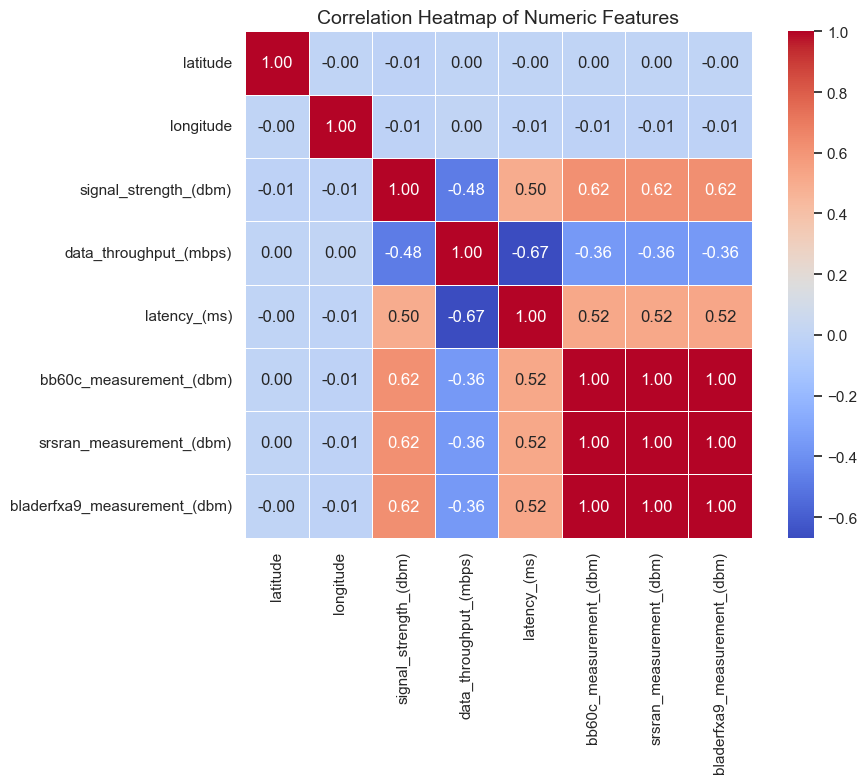

In [141]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.tight_layout()
plt.show()